## Reproject SEA ICE ARC L3 (from ENVISAT and  CRYOSAT-2) from a 1* grid to TOPAZ grid

In [1]:
# Read .nc for L3
# check resolution

# open TOPAZ4b product, get grid

# if number of points from L3 sufficient in one TOPAZ grid point:
# attribute average to the grid point

# for :
#      - sea ice thickness
#      - uncertainty
#      - status flag (0: no input data; 1: outside sea ice concentration mask; 2: latitude above orbit inclination; 
# 3: land, lake or land ice; 4: sea ice thickness retrieval failed; 5: sea ice thickness retrieval successful)
#      - quality flag (0:no thickness data, 1: good, 2: intermediate, 3: low)




In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc4
import pandas as pd

In [3]:
import src.utils.tardisml_utils as tardisml_utils
rootdir = tardisml_utils.get_rootdir()

In [4]:
path = f'{rootdir}Leo/SIT_observations/SEAICE_ARC_L3/'
ifile = 'cdr_ice_thick_nh_1676284808687.nc'

nc = nc4.Dataset(f'{path}{ifile}', mode='r')
sit_l3 = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['sea_ice_thickness']
sit_un = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['uncertainty']
status = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['status_flag']
quality = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['quality_flag']

In [5]:
chrono_l3 = pd.DataFrame({'date':pd.to_datetime(sit_l3['time'].to_numpy())})

In [6]:
# Cap negative value at 0 m (while keeping nan)
sit_l3 = (sit_l3.where((0<sit_l3), 0)).where(np.isfinite(sit_l3))

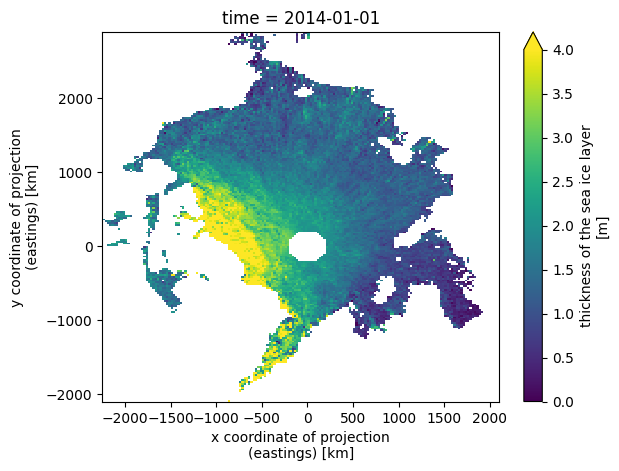

In [7]:
sit_l3.isel(time=80, yc=slice(100,332-32), xc=slice(126,300)).plot(vmax=4)

## Project CCI to TOPAZ grid

CCI = Lambert Azimuthal Grid

In [8]:
sit_l3.isel(time=80, yc=slice(100,332-32), xc=slice(126,300))

<xarray.DataArray 'sea_ice_thickness' (yc: 200, xc: 174)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * yc       (yc) float64 2.888e+03 2.862e+03 ... -2.062e+03 -2.088e+03
    lon      (yc, xc) float64 -142.2 -142.5 -142.9 -143.2 ... 44.31 44.65 45.0
  * xc       (xc) float64 -2.238e+03 -2.212e+03 ... 2.062e+03 2.088e+03
    time     datetime64[ns] 2014-01-01
    lat      (yc, xc) float64 56.8 56.94 57.08 57.22 ... 63.79 63.63 63.47 63.31
Attributes:
    ancillary_variables:  uncertainty status_flag quality_indicator_flag
    comment:              this field is the primary sea ice thickness estimat...
    grid_mapping:         Lambert_Azimuthal_Grid
    long_name:            thickness of the sea ice layer
    standard_name:        sea_ice_thickness
    units:                m
    _ChunkSizes:          [  1 432 432]

In [9]:
sit_l3.lat

<xarray.DataArray 'lat' (yc: 432, xc: 432)>
array([[16.62392669, 16.82265381, 17.02065868, ..., 17.02065868,
        16.82265381, 16.62392669],
       [16.82265381, 17.02158442, 17.21979481, ..., 17.21979481,
        17.02158442, 16.82265381],
       [17.02065868, 17.21979481, 17.41821274, ..., 17.41821274,
        17.21979481, 17.02065868],
       ...,
       [17.02065868, 17.21979481, 17.41821274, ..., 17.41821274,
        17.21979481, 17.02065868],
       [16.82265381, 17.02158442, 17.21979481, ..., 17.21979481,
        17.02158442, 16.82265381],
       [16.62392669, 16.82265381, 17.02065868, ..., 17.02065868,
        16.82265381, 16.62392669]])
Coordinates:
  * yc       (yc) float64 5.388e+03 5.362e+03 ... -5.362e+03 -5.388e+03
    lon      (yc, xc) float64 -135.0 -135.1 -135.3 -135.4 ... 44.73 44.87 45.0
  * xc       (xc) float64 -5.388e+03 -5.362e+03 ... 5.362e+03 5.388e+03
    lat      (yc, xc) float64 16.62 16.82 17.02 17.22 ... 17.02 16.82 16.62
Attributes:
    long_name:            latitude coordinate
    standard_name:        latitude
    units:                degrees_north
    _ChunkSizes:          [432 432]
    _CoordinateAxisType:  Lat

In [10]:
sit_l3.lon

<xarray.DataArray 'lon' (yc: 432, xc: 432)>
array([[-135.        , -135.13324576, -135.26711126, ...,  135.26711126,
         135.13324576,  135.        ],
       [-134.86675424, -135.        , -135.1338684 , ...,  135.1338684 ,
         135.        ,  134.86675424],
       [-134.73288874, -134.8661316 , -135.        , ...,  135.        ,
         134.8661316 ,  134.73288874],
       ...,
       [ -45.26711126,  -45.1338684 ,  -45.        , ...,   45.        ,
          45.1338684 ,   45.26711126],
       [ -45.13324576,  -45.        ,  -44.8661316 , ...,   44.8661316 ,
          45.        ,   45.13324576],
       [ -45.        ,  -44.86675424,  -44.73288874, ...,   44.73288874,
          44.86675424,   45.        ]])
Coordinates:
  * yc       (yc) float64 5.388e+03 5.362e+03 ... -5.362e+03 -5.388e+03
    lon      (yc, xc) float64 -135.0 -135.1 -135.3 -135.4 ... 44.73 44.87 45.0
  * xc       (xc) float64 -5.388e+03 -5.362e+03 ... 5.362e+03 5.388e+03
    lat      (yc, xc) float64 16.62 16.82 17.02 17.22 ... 17.02 16.82 16.62
Attributes:
    standard_name:        longitude
    units:                degrees_east
    long_name:            longitude coordinate
    _ChunkSizes:          [432 432]
    _CoordinateAxisType:  Lon

In [11]:
import pyproj

In [12]:
pyproj.CRS?

In [13]:
# Project CS2 to TOPAZ projected coordinates

# Define the input and output coordinate systems
# in_proj = pyproj.CRS('EPSG:3035')  # Lambert Azimuthal Grid ??
in_proj = pyproj.CRS('+proj=laea')  # Lambert Azimuthal Grid


# define TOPAZ projection: a bit offset compared to North Polar Stereographic
proj_str = ('+proj=stere +a=6378273 +b=6356889.44891 +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=10901.11 +y_0=10901.447')
out_proj = pyproj.CRS(proj_str)

In [14]:
pp = pyproj.Proj('+proj=stere +a=6378273 +b=6356889.44891 +lat_0=90 +lat_ts=70 +lon_0=-45 +x_0=10901.11 +y_0=10901.447')

In [15]:
sit_l3

<xarray.DataArray 'sea_ice_thickness' (time: 90, yc: 432, xc: 432)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * yc       (yc) float64 5.388e+03 5.362e+03 ... -5.362e+03 -5.388e+03
    lon      (yc, xc) float64 -135.0 -135.1 -135.3 -135.4 ... 44.73 44.87 45.0
  * xc       (xc) float64 -5.388e+03 -5.362e+03 ... 5.362e+03 5.388e+03
  * time     (time) datetime64[ns] 2002-10-01 2002-11-01 ... 2015-03-01
    lat      (yc, xc) float64 16.62 16.82 17.02 17.22 ... 17.02 16.82 16.62
Attributes:
    ancillary_variables:  uncertainty status_flag quality_indicator_flag
    comment:              this field is the primary sea ice thickness estimat...
    grid_mapping:         Lambert_Azimuthal_Grid
    long_name:            thickness of the sea ice layer
    standard_name:        sea_ice_thickness
    units:                m
    _ChunkSizes:          [  1 432 432]

In [16]:
# get projected lat lon
pp(sit_l3.lon, sit_l3.lat)

(array([[-9193695.0866386 , -9160599.08250591, -9127656.99202459, ...,
           -31702.89047564,   -10427.96021513,    10901.11      ],
        [-9160599.08250591, -9127602.83012414, -9094759.553706  , ...,
           -10373.79809277,    10901.11      ,    32230.18021513],
        [-9127656.99202459, -9094759.553706  , -9062014.1644574 , ...,
            10901.11      ,    32176.01809277,    53505.11047564],
        ...,
        [  -31702.89047564,   -10373.79809277,    10901.11      , ...,
          9083816.3844574 ,  9116561.773706  ,  9149459.21202459],
        [  -10427.96021513,    10901.11      ,    32176.01809277, ...,
          9116561.773706  ,  9149405.05012413,  9182401.30250591],
        [   10901.11      ,    32230.18021513,    53505.11047564, ...,
          9149459.21202459,  9182401.30250591,  9215497.3066386 ]]),
 array([[   10901.447     ,    32230.51721513,    53505.44747564, ...,
          9149459.54902459,  9182401.63950591,  9215497.6436386 ],
        [  -10427.6

In [ ]:
# then scipy Grid Interpolate

In [11]:
# Create a transformer to convert from lat/lon to North Polar Stereographic
transformer = pyproj.Transformer.from_crs(in_proj, out_proj)

# Define the latitude and longitude to convert
lon0, lat0 = -105.2705, 80.0150

# Convert the latitude and longitude to North Polar Stereographic
x, y = transformer.transform(lat,lon)

x, y = x/1e5, y/1e5  # from m to 100 km (used in Topaz)

# Print the resulting x and y coordinates
# print("North Polar Stereographic Coordinates: ", x, y)

NameError: name 'lat' is not defined

In [14]:
import datetime
import os
from src.data_preparation import load_data

In [15]:
# -----------------------------------
#         Load TOPAZ 2010-2019
# -----------------------------------

# global prediction RF:  (as example)
filename = f'{rootdir}Leo/results/rf_221216-141433/ml/sit_ml_2011_2019.nc'
# Saved as: /scratch/project_465000269/edelleo1/Leo/results/rf_221229-171734/ml/sit_ml_2000_2011.nc
ml_model = 'RF'

filename = f'{rootdir}Leo/results/lstm_230201-112355/ml/sit_gLSTM3_bk_2011_2019_01.nc'
ml_model = 'LSTM'


sit, chrono = load_data.load_nc(filename, 'sit_ml', X_only=True)

# Cap negative value at 0 m (while keeping nan)
sit = (sit.where((0<sit), 0)).where(np.isfinite(sit))

In [16]:
# need to get monthly mean
sit_mm = sit.resample(time='1M').mean()

In [17]:
# change time axis to first day of each month
time_idx = sit_mm.time.to_index()
sit_mm['time'] = [datetime.datetime(t.year, t.month, 1) for t in time_idx]

In [18]:
chrono_mm = pd.DataFrame({'date':pd.to_datetime(sit_mm['time'].to_numpy())})

In [19]:
sit_na, _ = load_data.load_nc(filename, 'sit_na', X_only=True)


In [20]:
# -----------------------------------
#      compute baseline
# -----------------------------------
# from src.feature_extraction import baseline
from src.feature_extraction import mean_error

pca_dir = 'Leo/results/pca_i100-550_j300-629/'

basefile = os.path.join(rootdir, pca_dir, f"Baseline_monthly_error_2013_2019.nc")
nc = nc4.Dataset(basefile, mode='r')
bl_xe_mm = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['Xe_mm']
        
# apply to self.sit_na, chrono_a
sit_bl = mean_error.apply_mean_correction(chrono, sit_na, bl_xe_mm)


In [21]:
sit_bl_mm = sit_bl.resample(time='1M').mean()

In [22]:
sit_na_mm = sit_na.resample(time='1M').mean()

# Plot

In [23]:
# convert panda to datetime array
dt_l3 = np.array([dt.date() for dt in chrono_l3.date])
dt_mm = np.array([dt.date() for dt in chrono_mm.date])

In [17]:
dt_l3[63:]  # date for comparison with TOPAZ Oct 2011-2019

array([datetime.date(2011, 10, 1), datetime.date(2011, 11, 1),
       datetime.date(2011, 12, 1), datetime.date(2012, 1, 1),
       datetime.date(2012, 2, 1), datetime.date(2012, 3, 1),
       datetime.date(2012, 4, 1), datetime.date(2012, 10, 1),
       datetime.date(2012, 11, 1), datetime.date(2012, 12, 1),
       datetime.date(2013, 1, 1), datetime.date(2013, 2, 1),
       datetime.date(2013, 3, 1), datetime.date(2013, 4, 1),
       datetime.date(2013, 10, 1), datetime.date(2013, 11, 1),
       datetime.date(2013, 12, 1), datetime.date(2014, 1, 1),
       datetime.date(2014, 2, 1), datetime.date(2014, 3, 1),
       datetime.date(2014, 4, 1), datetime.date(2014, 10, 1),
       datetime.date(2014, 11, 1), datetime.date(2014, 12, 1),
       datetime.date(2015, 1, 1), datetime.date(2015, 2, 1),
       datetime.date(2015, 3, 1)], dtype=object)

In [24]:
from src.utils import save_name
from src.utils import modif_plot

In [25]:
from mpl_toolkits.basemap import Basemap

In [26]:

def double_basemap(lats, lons, sit_obs, lats2, lons2, sit_tp, suptitle='', odir='', ofile='', savefig=False, showfig=True, **kwargs):
    '''
    Parameters:
    -----------
            lats         :        grid of latitude, dimension from sit_obs
            lons         :        grid of longitude
            sit_obs      :        xr.DataArray, Sea Ice Thickness from CCI dataset
            lats2        :        grid of latitude, dimension from sit_tp
            lons2        :        grid of longitude
            sit_tp       :        xr.DataArray, Sea Ice Thickness from ToPaz
    
    '''
    
    
#     fig = plt.figure(figsize=((1920/103)/1.5,1200/103),dpi=103)
    
    fig, axes = plt.subplots(ncols=2, figsize=(9*2, 9), constrained_layout=True)
    
    m = Basemap(projection='npstere', boundinglat=68, lon_0=0, resolution='l', round=True, ax=axes[0])
    m.drawcoastlines()
    m.drawparallels(np.arange(-80.,81.,20.))
    m.drawmeridians(np.arange(-180.,181.,20.))
    
    mlons, mlats = m(lons, lats)
    
    m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)
    # cbar = plt.colorbar(cs)
    # cbar.set_label('{}'.format(label_cb))
    axes[0].set_title('CCI')
    
    
    m2 = Basemap(projection='npstere', boundinglat=68, lon_0=0, resolution='l', round=True, ax=axes[1])
    m2.drawcoastlines()
    m2.drawparallels(np.arange(-80.,81.,20.))
    m2.drawmeridians(np.arange(-180.,181.,20.))
    
    mlons2, mlats2 = m2(lons2, lats2)
    
    cs2 = m2.pcolormesh(mlons2, mlats2, sit_tp, zorder=10, **kwargs)
    axes[1].set_title('TOPAZ')
    
    
    cbar=fig.colorbar(cs2, ax=axes, shrink=0.3, location="bottom", extend='max')
    cbar.set_label('SIT (m)')
    
    fig.suptitle(suptitle)
    modif_plot.resize(fig, s=24)
    
    if savefig:
        if ofile=='':
            return
        
        ofile = save_name.check(f"{odir}", ofile)
        plt.savefig(f"{odir}{ofile}", dpi=124, facecolor='white')
        print(f'Figure saved as : {odir}{ofile}')
        
    if showfig:
        plt.show()
        
    plt.close()

In [21]:
# loop over months in common
for mdate in dt_l3[63:]:
    idx_l3 = np.where(dt_l3==mdate)[0]  # get time index to plot
    idx_mm = np.where(dt_mm==mdate)[0] 

    # parameters for plot and save
    suptitle = f'{dt_mm[idx_mm][0].strftime("%Y%m")}'
    odir = f'{rootdir}Leo/results/SIT_observations/SEAICE_ARC_L3/'
    ofile = f'CCI_TOPAZ{ml_model}_{suptitle}_basemap.png'
    
    double_basemap(sit_l3.lat, sit_l3.lon, sit_l3.isel(time=idx_l3[0]), sit_mm.latitude, sit_mm.longitude, sit_mm.isel(time=idx_mm[0]), suptitle=suptitle, showfig=False, vmax=4, ofile=ofile, odir=odir, savefig=True, vmin=0)

/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201110_basemap.png


/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201111_basemap.png


/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201112_basemap.png


/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201201_basemap.png


/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201202_basemap.png


/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201203_basemap.png


/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201204_basemap.png


/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201210_basemap.png


/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201211_basemap.png


/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201212_basemap.png


/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201301_basemap.png


/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201302_basemap.png


/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201303_basemap.png


/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201304_basemap.png


/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201310_basemap.png


/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201311_basemap.png


/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201312_basemap.png


/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201401_basemap.png


/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201402_basemap.png


/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201403_basemap.png


/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201404_basemap.png


/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201410_basemap.png


/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201411_basemap.png


/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201412_basemap.png


/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201501_basemap.png


/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201502_basemap.png


/tmp/ipykernel_215549/385793592.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(mlons, mlats, sit_obs, zorder=10, **kwargs)


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZLSTM_201503_basemap.png


Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZ_FR_baseline_201110_basemap_01.png
Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZ_FR_baseline_201111_basemap_01.png
Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZ_FR_baseline_201112_basemap_01.png
Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZ_FR_baseline_201201_basemap_01.png
Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZ_FR_baseline_201202_basemap_01.png
Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZ_FR_baseline_201203_basemap_01.png
Figure saved as : /scratch/project_465000269/edelleo1/Leo/results/SIT_observations/SEAICE_ARC_L3/CCI_TOPAZ_FR_baseline_201204_basemap_01.png
Figure saved 

KeyboardInterrupt: 

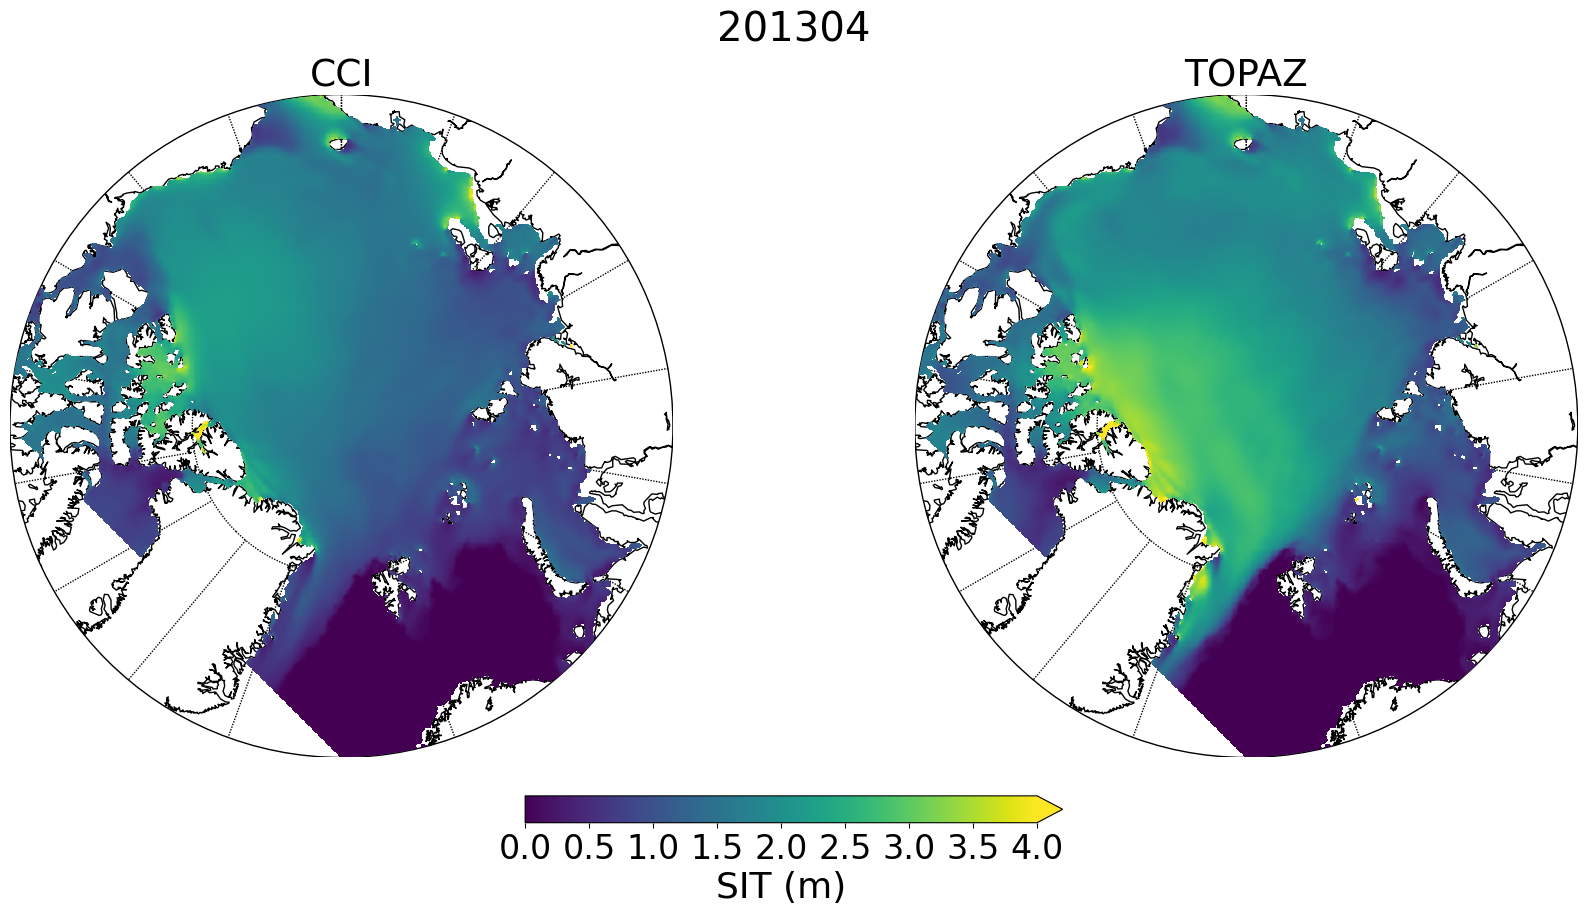

In [64]:
# loop over months in common
for mdate in dt_l3[63:]:
    idx_l3 = np.where(dt_l3==mdate)[0]  # get time index to plot
    idx_mm = np.where(dt_mm==mdate)[0] 

    # parameters for plot and save
    suptitle = f'{dt_mm[idx_mm][0].strftime("%Y%m")}'
    odir = f'{rootdir}Leo/results/SIT_observations/SEAICE_ARC_L3/'
    ofile = f'CCI_TOPAZ_FR_baseline_{suptitle}_basemap.png'
    
    double_basemap(sit_na.latitude, sit_na.longitude, sit_na_mm.isel(time=idx_mm[0]), sit_bl.latitude, sit_bl.longitude, sit_bl_mm.isel(time=idx_mm[0]), suptitle=suptitle, showfig=False, vmax=4, ofile=ofile, odir=odir, savefig=True, vmin=0)

In [27]:
# plot time serie

# get all time indexes 
    
tidx_l3 = np.array([np.where(dt_l3==mdate)[0] for mdate in dt_l3[63:]]).squeeze()
tidx_mm = np.array([np.where(dt_mm==mdate)[0] for mdate in dt_l3[63:]]).squeeze()



In [28]:
# plot time serie

# get all time indexes IN TEST PERIOD (2011-2013)
    
tidx_l3 = np.array([np.where(dt_l3==mdate)[0] for mdate in dt_l3[63:63+14]]).squeeze()
tidx_mm = np.array([np.where(dt_mm==mdate)[0] for mdate in dt_l3[63:63+14]]).squeeze()



In [90]:
tidx_l3

array([63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76])

In [27]:
sit_l3.isel(time=tidx_l3).std(('yc','xc'))

<xarray.DataArray 'sea_ice_thickness' (time: 27)>
array([0.4776026 , 0.5871917 , 0.6714534 , 0.7578464 , 0.7276448 ,
       0.8724047 , 0.8263257 , 0.6125994 , 0.6875623 , 0.64873004,
       0.7117004 , 0.68710303, 0.6935914 , 0.7010242 , 0.85520583,
       0.87951106, 0.97083133, 0.9382632 , 0.9064098 , 0.992881  ,
       0.98906744, 0.7601934 , 0.89886767, 0.951527  , 0.96675843,
       0.9416646 , 0.98730826], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2011-10-01 2011-11-01 ... 2015-03-01

In [26]:
sit_mm.isel(time=tidx_mm).std(('y','x'))

<xarray.DataArray 'sit_ml' (time: 27)>
array([0.7395369 , 0.81103174, 0.90020164, 0.95260556, 0.97156441,
       0.96160715, 1.00241256, 0.74887506, 0.86642509, 0.88777759,
       0.89259346, 0.95668206, 1.00793961, 0.98627028, 0.86149619,
       0.92894382, 0.951865  , 0.99319214, 1.049131  , 1.0706677 ,
       1.08219334, 0.90100935, 0.85273195, 0.9192898 , 0.98968072,
       1.03759366, 1.09837354])
Coordinates:
  * time     (time) datetime64[ns] 2011-10-01 2011-11-01 ... 2015-03-01

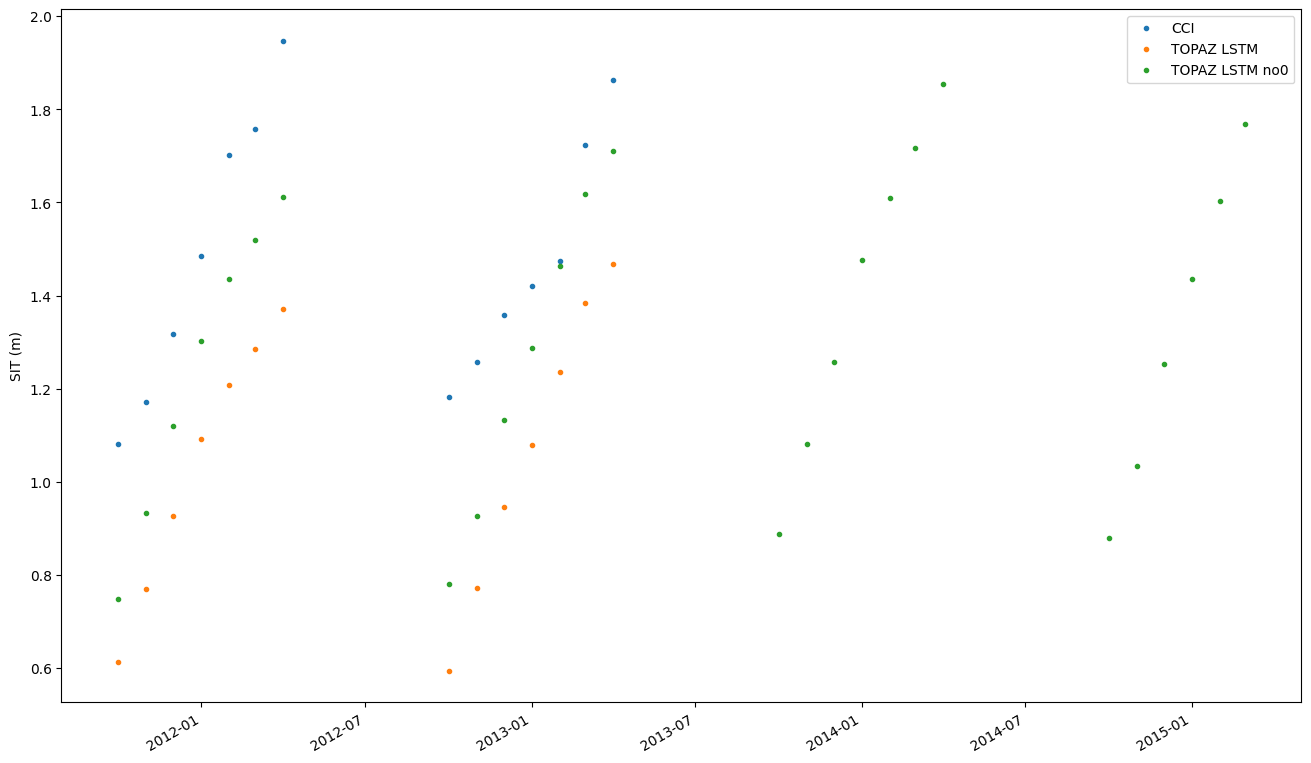

In [92]:
fig, ax = plt.subplots(figsize=(16, 9))

sit_l3.isel(time=tidx_l3).mean(('yc','xc')).plot(label='CCI', marker='.', lw=0)
sit_mm.isel(time=tidx_mm).mean(('y','x')).plot(label=f'TOPAZ {ml_model}', marker='.', lw=0)
sit2.plot(label=f'TOPAZ {ml_model} no0', marker='.', lw=0)

plt.xlabel('')
plt.ylabel('SIT (m)')

plt.legend()

In [102]:
sit_l3_mean.time

<xarray.DataArray 'time' (time: 14)>
array(['2011-10-01T00:00:00.000000000', '2011-11-01T00:00:00.000000000',
       '2011-12-01T00:00:00.000000000', '2012-01-01T00:00:00.000000000',
       '2012-02-01T00:00:00.000000000', '2012-03-01T00:00:00.000000000',
       '2012-04-01T00:00:00.000000000', '2012-10-01T00:00:00.000000000',
       '2012-11-01T00:00:00.000000000', '2012-12-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2013-02-01T00:00:00.000000000',
       '2013-03-01T00:00:00.000000000', '2013-04-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2011-10-01 2011-11-01 ... 2013-04-01
Attributes:
    standard_name:        time
    long_name:            reference time of product
    axis:                 T
    bounds:               time_bnds
    _ChunkSizes:          1
    _CoordinateAxisType:  Time
    valid_min:            1033430400.0
    valid_max:            1425168000.0

## New plot

In [29]:
import matplotlib.dates

In [32]:
new_time = matplotlib.dates.date2num(sit_l3_mean.time)

In [33]:
new_time

array([15248., 15279., 15309., 15340., 15371., 15400., 15431., 15614.,
       15645., 15675., 15706., 15737., 15765., 15796.])

In [34]:
new_ticks = matplotlib.dates.date2num(sit_l3_mean.time)[2::7]

In [35]:
new_ticks

array([15309., 15675.])

In [36]:
mid_ticks = [np.mean(new_ticks)]

In [37]:
mid_ticks

[15492.0]

In [38]:
new_ticks = np.array([15309, 15492, 15675])

In [39]:
from src.utils import modif_plot

In [31]:
sit_l3_mean = sit_l3.isel(time=tidx_l3).mean(('yc','xc'))
sit_l3_std = sit_l3.isel(time=tidx_l3).std(('yc','xc'))

In [40]:
# remove SIT == 0 (because not included in CCI)

sit_mm_mean = sit_mm.where(0<sit_mm).isel(time=tidx_mm).mean(('y','x'))
sit_mm_std = sit_mm.where(0<sit_mm).isel(time=tidx_mm).std(('y','x'))

sb_mean = sit_bl_mm.where(0<sit_bl_mm).isel(time=tidx_mm).mean(('y','x'))
sb_std = sit_bl_mm.where(0<sit_bl_mm).isel(time=tidx_mm).std(('y','x'))

sna_mean = sit_na_mm.where(0<sit_na_mm).isel(time=tidx_mm).mean(('y','x'))
sna_std = sit_na_mm.where(0<sit_na_mm).isel(time=tidx_mm).std(('y','x'))

In [ ]:
# NEW default colors  (for presentation SIAM - 20230619)
# TOPAZ (no assimilation):   orange   = #ff7f0e
# TOPAZ (assimilation)   :   blue     = #1f77b4
# baseline               :   green    = #2ca02c
# LSTM                   :   red      = #d62728

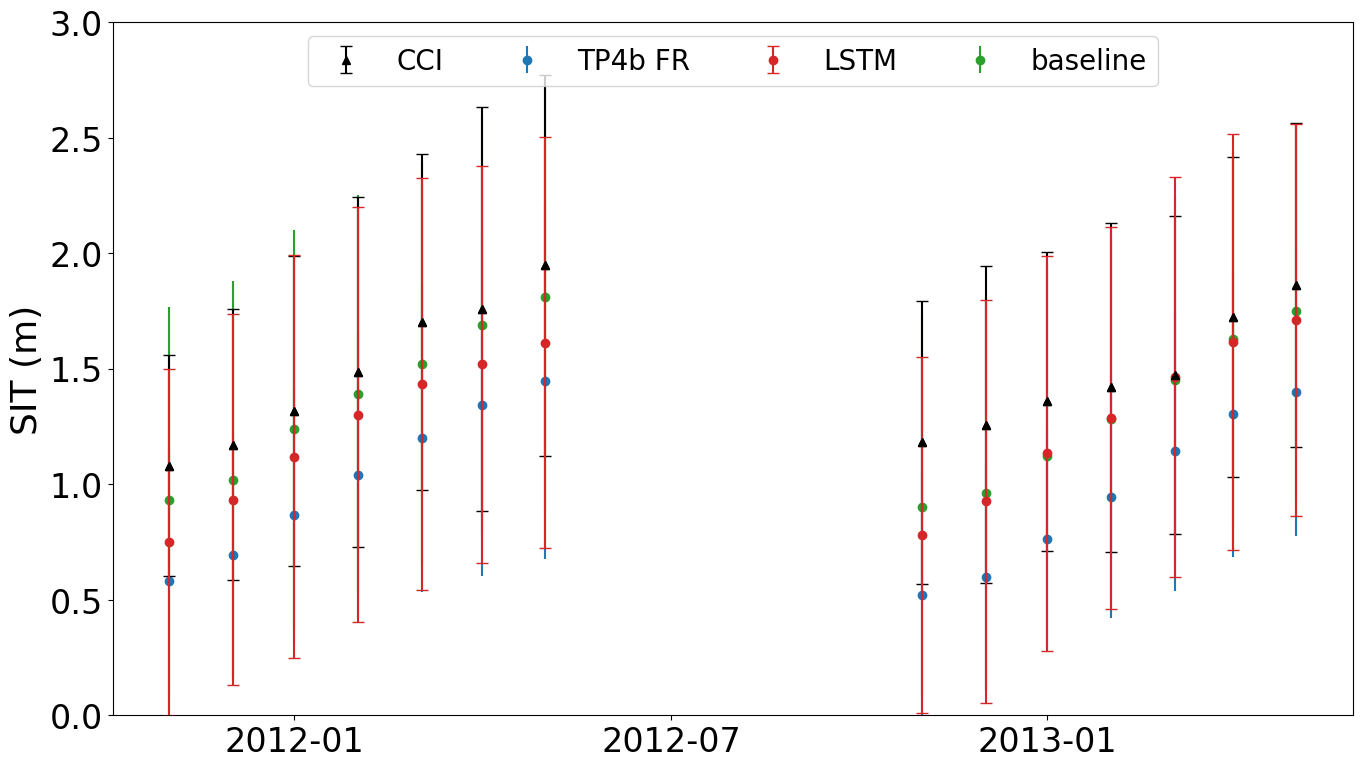

In [41]:
fig, ax = plt.subplots(figsize=(16, 9))

# sit_l3_mean.plot(label='CCI', marker='.', lw=0)
# (sit_l3_mean + sit_l3_std).plot(label='CCI', marker='.', lw=0)
# (sit_l3_mean - sit_l3_std).plot(label='CCI', marker='.', lw=0)

plt.errorbar(new_time, sit_l3_mean, sit_l3_std, ls='None', color='k', fmt='^', label='CCI', capsize=4, zorder=5)
plt.errorbar(new_time, sna_mean, sna_std, ls='None', color='#1f77b4', marker='o', label='TP4b FR', capsize=0)
plt.errorbar(new_time, sit_mm_mean, sit_mm_std, ls='None', color='#d62728', marker='o', label='LSTM', capsize=4, zorder=10)
plt.errorbar(new_time, sb_mean, sb_std, ls='None', color='#2ca02c', marker='o', label='baseline', capsize=0)
# plot just central marker of CCI
plt.errorbar(new_time, sit_l3_mean, ls='None', color='k', fmt='^', zorder=15)



plt.xlabel('')
plt.ylabel('SIT (m)')
plt.ylim([0, 3])

ax.set_xticks(new_ticks)
ax.set_xticklabels(['2012-01','2012-07','2013-01'])
# ax.set_xticklabels(['2012-01','2013-01','2014-01','2015-01'])
# ax.set_xticklabels(['','2012-01','2012-07','2013-01','2013-07','2014-01','2014-07','2015-01'])

plt.legend(loc='upper center', ncol=4, fontsize=20)

# modif_plot.resize(fig, s=24)

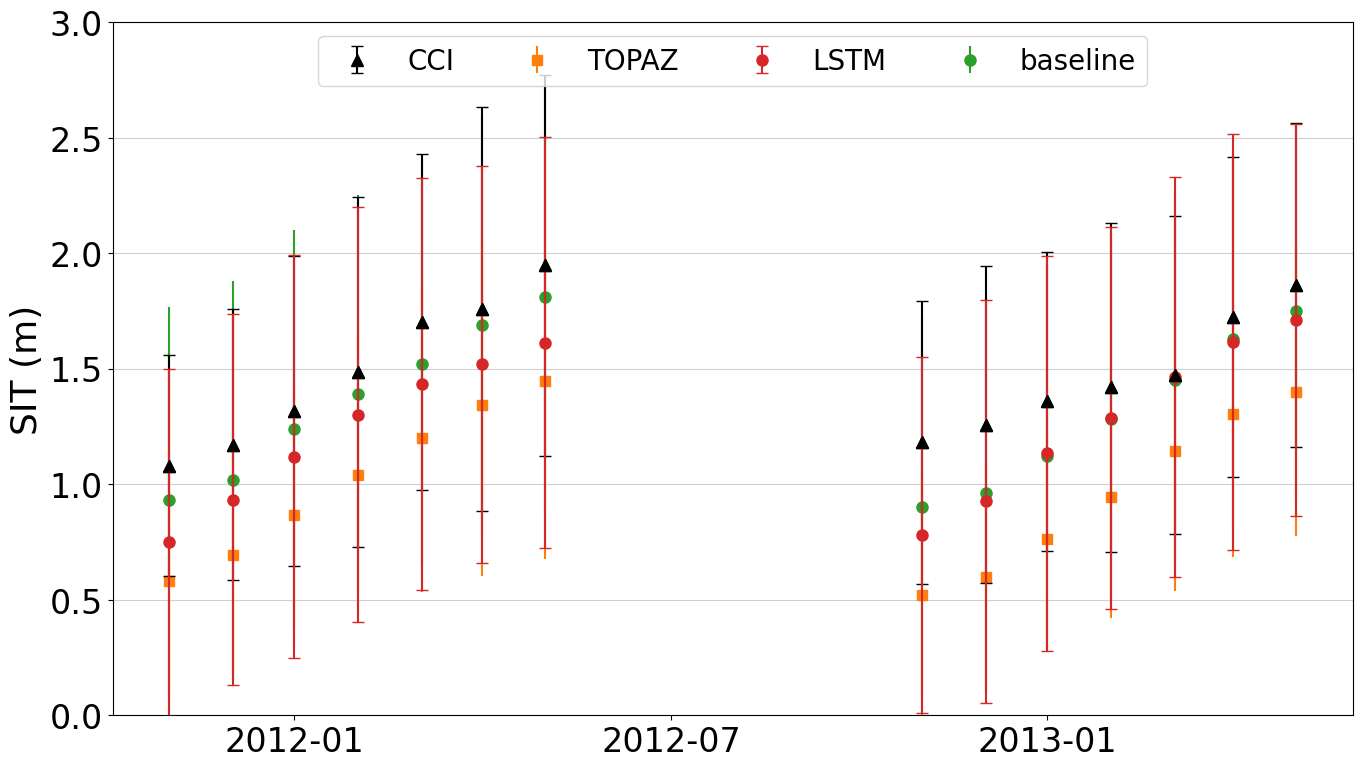

In [59]:
# pour la presenation SIAM

fig, ax = plt.subplots(figsize=(16, 9))

# sit_l3_mean.plot(label='CCI', marker='.', lw=0)
# (sit_l3_mean + sit_l3_std).plot(label='CCI', marker='.', lw=0)
# (sit_l3_mean - sit_l3_std).plot(label='CCI', marker='.', lw=0)

plt.errorbar(new_time, sit_l3_mean, sit_l3_std, ls='None', color='k', fmt='^', label='CCI', capsize=4, zorder=5, markersize=8)
plt.errorbar(new_time, sna_mean, sna_std, ls='None', color='#ff7f0e', marker='s', label='TOPAZ', capsize=0, markersize=7)
plt.errorbar(new_time, sit_mm_mean, sit_mm_std, ls='None', color='#d62728', marker='o', label='LSTM', capsize=4, zorder=10, markersize=8)
plt.errorbar(new_time, sb_mean, sb_std, ls='None', color='#2ca02c', marker='o', label='baseline', capsize=0, markersize=8)
# plot just central marker of CCI
plt.errorbar(new_time, sit_l3_mean, ls='None', color='k', fmt='^', zorder=15, markersize=8)



plt.xlabel('')
plt.ylabel('SIT (m)')
plt.ylim([0, 3])

ax.set_xticks(new_ticks)
ax.set_xticklabels(['2012-01','2012-07','2013-01'])
ax.yaxis.grid(alpha=0.6)


plt.legend(loc='upper center', ncol=4, fontsize=20)

modif_plot.resize(fig, s=24)

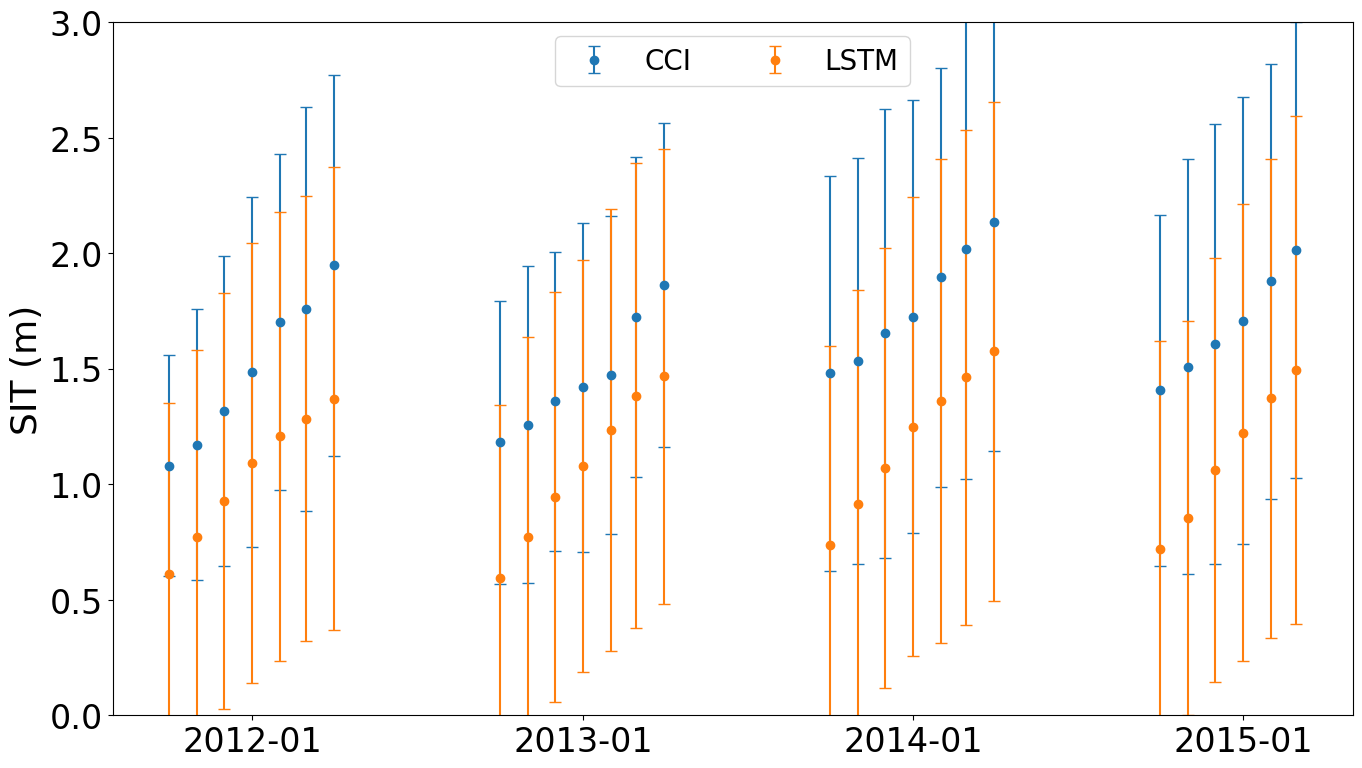

In [88]:
fig, ax = plt.subplots(figsize=(16, 9))

sit_l3_mean = sit_l3.isel(time=tidx_l3).mean(('yc','xc'))
sit_l3_std = sit_l3.isel(time=tidx_l3).std(('yc','xc'))

sit_mm_mean = sit_mm.isel(time=tidx_mm).mean(('y','x'))
sit_mm_std = sit_mm.isel(time=tidx_mm).std(('y','x'))


# sit_l3_mean.plot(label='CCI', marker='.', lw=0)
# (sit_l3_mean + sit_l3_std).plot(label='CCI', marker='.', lw=0)
# (sit_l3_mean - sit_l3_std).plot(label='CCI', marker='.', lw=0)

plt.errorbar(new_time, sit_l3_mean, sit_l3_std, ls='None', fmt='o', label='CCI', capsize=4)

plt.errorbar(new_time, sit_mm_mean, sit_mm_std, ls='None', marker='o', label='LSTM', capsize=4)

plt.xlabel('')
plt.ylabel('SIT (m)')
plt.ylim([0, 3])

ax.set_xticks(new_ticks)
ax.set_xticklabels(['2012-01','2013-01','2014-01','2015-01'])
# ax.set_xticklabels(['','2012-01','2012-07','2013-01','2013-07','2014-01','2014-07','2015-01'])

plt.legend(loc='upper center', ncol=2, fontsize=20)

modif_plot.resize(fig, s=24)



In [323]:
sit_mm.time

<xarray.DataArray 'time' (time: 99)>
array(['2011-10-01T00:00:00.000000000', '2011-11-01T00:00:00.000000000',
       '2011-12-01T00:00:00.000000000', '2012-01-01T00:00:00.000000000',
       '2012-02-01T00:00:00.000000000', '2012-03-01T00:00:00.000000000',
       '2012-04-01T00:00:00.000000000', '2012-05-01T00:00:00.000000000',
       '2012-06-01T00:00:00.000000000', '2012-07-01T00:00:00.000000000',
       '2012-08-01T00:00:00.000000000', '2012-09-01T00:00:00.000000000',
       '2012-10-01T00:00:00.000000000', '2012-11-01T00:00:00.000000000',
       '2012-12-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2013-02-01T00:00:00.000000000', '2013-03-01T00:00:00.000000000',
       '2013-04-01T00:00:00.000000000', '2013-05-01T00:00:00.000000000',
       '2013-06-01T00:00:00.000000000', '2013-07-01T00:00:00.000000000',
       '2013-08-01T00:00:00.000000000', '2013-09-01T00:00:00.000000000',
       '2013-10-01T00:00:00.000000000', '2013-11-01T00:00:00.000000000',
       '2013-12-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2014-02-01T00:00:00.000000000', '2014-03-01T00:00:00.000000000',
       '2014-04-01T00:00:00.000000000', '2014-05-01T00:00:00.000000000',
       '2014-06-01T00:00:00.000000000', '2014-07-01T00:00:00.000000000',
       '2014-08-01T00:00:00.000000000', '2014-09-01T00:00:00.000000000',
       '2014-10-01T00:00:00.000000000', '2014-11-01T00:00:00.000000000',
       '2014-12-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
       '2015-02-01T00:00:00.000000000', '2015-03-01T00:00:00.000000000',
       '2015-04-01T00:00:00.000000000', '2015-05-01T00:00:00.000000000',
       '2015-06-01T00:00:00.000000000', '2015-07-01T00:00:00.000000000',
       '2015-08-01T00:00:00.000000000', '2015-09-01T00:00:00.000000000',
       '2015-10-01T00:00:00.000000000', '2015-11-01T00:00:00.000000000',
       '2015-12-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2016-02-01T00:00:00.000000000', '2016-03-01T00:00:00.000000000',
       '2016-04-01T00:00:00.000000000', '2016-05-01T00:00:00.000000000',
       '2016-06-01T00:00:00.000000000', '2016-07-01T00:00:00.000000000',
       '2016-08-01T00:00:00.000000000', '2016-09-01T00:00:00.000000000',
       '2016-10-01T00:00:00.000000000', '2016-11-01T00:00:00.000000000',
       '2016-12-01T00:00:00.000000000', '2017-01-01T00:00:00.000000000',
       '2017-02-01T00:00:00.000000000', '2017-03-01T00:00:00.000000000',
       '2017-04-01T00:00:00.000000000', '2017-05-01T00:00:00.000000000',
       '2017-06-01T00:00:00.000000000', '2017-07-01T00:00:00.000000000',
       '2017-08-01T00:00:00.000000000', '2017-09-01T00:00:00.000000000',
       '2017-10-01T00:00:00.000000000', '2017-11-01T00:00:00.000000000',
       '2017-12-01T00:00:00.000000000', '2018-01-01T00:00:00.000000000',
       '2018-02-01T00:00:00.000000000', '2018-03-01T00:00:00.000000000',
       '2018-04-01T00:00:00.000000000', '2018-05-01T00:00:00.000000000',
       '2018-06-01T00:00:00.000000000', '2018-07-01T00:00:00.000000000',
       '2018-08-01T00:00:00.000000000', '2018-09-01T00:00:00.000000000',
       '2018-10-01T00:00:00.000000000', '2018-11-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
       '2019-02-01T00:00:00.000000000', '2019-03-01T00:00:00.000000000',
       '2019-04-01T00:00:00.000000000', '2019-05-01T00:00:00.000000000',
       '2019-06-01T00:00:00.000000000', '2019-07-01T00:00:00.000000000',
       '2019-08-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
       '2019-10-01T00:00:00.000000000', '2019-11-01T00:00:00.000000000',
       '2019-12-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2011-10-01 2011-11-01 ... 2019-12-01

In [86]:
sit2 = sit_mm.where(0<sit_mm).isel(time=tidx_mm).mean(('y','x'))

In [251]:
sit_tl3 = sit_l3.isel(time=tidx_l3).mean(('yc','xc'))

In [252]:
sit_tl3

<xarray.DataArray 'sea_ice_thickness' (time: 27)>
array([1.0806414, 1.1710519, 1.3185946, 1.4845265, 1.7014549, 1.7588346,
       1.9471974, 1.1813612, 1.2580724, 1.3588738, 1.4196376, 1.473411 ,
       1.7235671, 1.8624564, 1.4809043, 1.5329667, 1.6530608, 1.725556 ,
       1.8957909, 2.0174716, 2.1346312, 1.4068317, 1.5094987, 1.6079568,
       1.7077342, 1.8784072, 2.0130334], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2011-10-01 2011-11-01 ... 2015-03-01

In [271]:
dico_violin_l3 = {}
dico_violin_mm = {}

In [303]:
for mdate in dt_l3[63:]:
    idx_l3 = np.where(dt_l3==mdate)[0]  # get time index to plot
    idx_mm = np.where(dt_mm==mdate)[0] 

    strdate = f'{dt_mm[idx_mm][0].strftime("%Y%m")}'
    
    # dico_violin_l3[strdate] = sit_l3.isel(time=idx_l3)
    dico_violin_l3[strdate] = sit_l3.isel(time=idx_l3).data[~np.isnan(sit_l3.isel(time=idx_l3).data)]
#     dico_violin_mm[strdate] = sit_mm.isel(time=idx_mm)
    dico_violin_mm[strdate] = sit_mm.isel(time=idx_mm).data[~np.isnan(sit_mm.isel(time=idx_mm).data)]    

In [329]:
sit_mm.time[0]

<xarray.DataArray 'time' ()>
array('2011-10-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2011-10-01

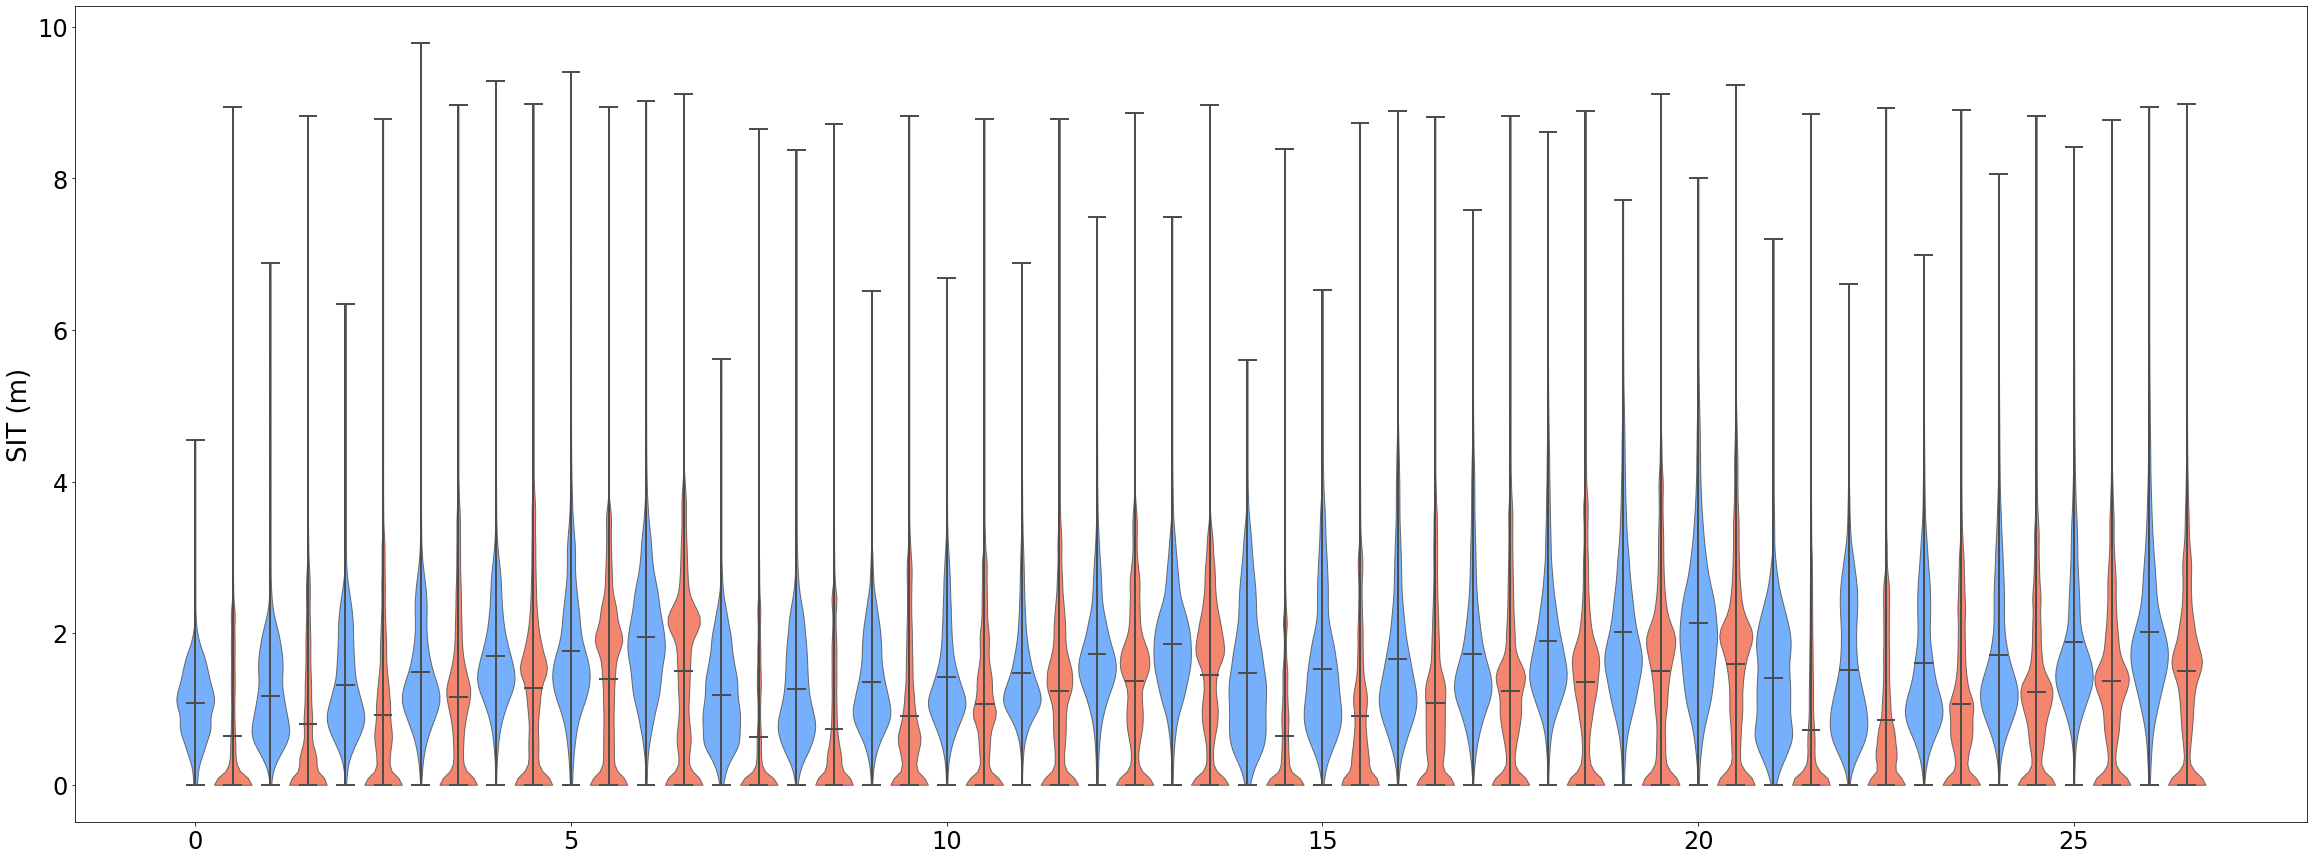

In [337]:
fig, ax = plt.subplots(figsize=(40,15))

violons_parts_l3 = {}
violons_parts_mm = {}


for idx, kk in enumerate(list(dico_violin_l3.keys())):    
    violons_parts_l3[idx] = plt.violinplot(dico_violin_l3[kk], [idx], showmedians=False, showmeans=True)
    
    violons_parts_mm[idx] = plt.violinplot(dico_violin_mm[kk], [idx+0.5], showmedians=False, showmeans=True)    
    
    
ax.set_xlabel('')
ax.set_ylabel('SIT (m)')
    
    
orange = '#F2684C'
blue = '#549DFC'  # '#2F2079' # '#674BF1'  # #4BD6F1'  # 09306B'
grey = '#4D4D4D'

# modify colors of violons FOR CCI
for d_idx, kk in enumerate(list(dico_violin_l3.keys())):    
    for partname in ('cbars','cmins','cmaxes','cmeans'):
        vp = violons_parts_l3[d_idx][partname]
        vp.set_edgecolor(grey)
        vp.set_linewidth(2)
    for vp in violons_parts_l3[d_idx]['bodies']:
        vp.set_facecolor(blue)
        vp.set_edgecolor(grey)
       # vp.set_linewidth(1)
        vp.set_alpha(.8)
        
        
# modify colors of violons for TOPAZ
for d_idx, kk in enumerate(list(dico_violin_mm.keys())):    
    for partname in ('cbars','cmins','cmaxes','cmeans'):
        vp = violons_parts_mm[d_idx][partname]
        vp.set_edgecolor(grey)
        vp.set_linewidth(2)
    for vp in violons_parts_mm[d_idx]['bodies']:
        vp.set_facecolor(orange)
        vp.set_edgecolor(grey)
       # vp.set_linewidth(1)
        vp.set_alpha(.8)
    
modif_plot.resize(fig, s=24, rx=0)
